# Protein-ligand binding

## __<font color=blue>Introduction</font>__
---

In the following simple mechanism, $A$ is the protein, $B$ the ligand, and $AB$ the protein-ligand complex:

$$
A + B \underset{k_{-1}}{\stackrel{k_{+1}}{\rightleftharpoons}} AB .
$$

Where $k_{+1}$ (in $\mu$$M^{-1}$ $s^{-1}$) and $k_{−1}$ (in $s^{-1}$) are rate constants for the forward and reverse reactions between $A$ and $B$.

In this notebook, we will determine __<font color=red>the equilibrium binding constant, $K_d = \frac{[A]_{eq}[B]_{eq}}{[AB]_{eq}}$</font>__ (in $M$) in different conditions:

- Weak binding: $[A]_0 \ll K_d$ and $[B]_0 \gg [A]_0$
- Tight binding: $[A]_0 > K_d$

We will also investigate how to study protein-ligand binding using thermal shift assay data.

### _Convention_

We will use the convention that $[A]$ is the concentration of free $A$, $[A]_0$ is the initial (or total) concentration of $A$ before any binding or conversion occurs, and $[A]_{eq}$ is the concentration of $A$ at equilibrium.

### _$K_d$_

The $K_d$ reports the __extent of binding__ that occurs between two biomolecules, _e.g._ a protein $A$ and a ligand $B$. Using the $K_d$, $[B]_0$, and $[A]_0$ we can estimate how much protein-ligand complex $AB$ is formed. _It is important to realize that the amount of complex formation does not depend on excess of $[B]_0$ over $[A]_0$, but on how much $[B]_0$ exceeds the $K_d$!_

The $K_d$ is a measurement of __affinity__ between two molecules. A low $K_d$ value indicates that the two molecules have a high affinity for each other: a low concentration of the ligand is needed to saturate the protein. A high $K_d$ value indicates that the two molecules have a low affinity for each other: a high concentration of the ligand is needed to saturate the protein.

### _Experimental design_

Several methods exist to quantitatively measure binding affinity, including
- fluorescence intensity
- fluorescence anisotropy or fluorescence polarization
- isothermal titration calorimetry (ITC)
- optical biosensors
- chemical shift perturbation (CSP) experiments in solution nuclear magnetic resonance (NMR) spectroscopy
- electrophoretic mobility shift assay (EMSA)
- thermal shift assay (TSA) or differential scanning fluorimetry (DSF)
- ...

For all methods:
1. we perform __a titration__ of one binding partner (= the titrant, usually the ligand $B$) against a constant concentration of the other binding partner (= the analyte, usually the protein $A$). In the titration, $[A]_0$ is fixed and increasing amounts of $[B]_0$ are added and the formation of $[AB]_{eq}$ is followed via _e.g._ a change in fluorescence intensity.
2. we plot our experimental values as a function of titrant concentration
3. we fit the data to an appropriate equilibrium binding equation

## __<font color=blue>Data</font>__
---

Get the data needed for this exercise [here](https://github.com/renee-85/PythonForBIOC0029/tree/master/data).

The spreadsheet "ProteinLigandBinding.xlsx" contains three sheets _(see figure below)_, make sure to read in the correct sheet.

```{image} ./Images/DataProteinLigandBinding.png
:alt: Protein-ligand binding assay data
:width: 600px
:align: center
```

## __<font color=blue>Weak binding conditions</font>__
---

### _Background_

We are provided with data which describe the fluorescence from component $A$ (at 0.5 $\mu$$M$, $[A]_0 \ll K_d$) on addition of a large excess of component $B$ ($[B]_0 \gg [A]_0$), which is non-fluorescent. A schematic (based on a published phosphate biosensor by Brune _et al_, see [here](https://pubs.acs.org/doi/10.1021/bi00193a013)) is shown below. 

```{image} ./Images/FluorescentProteinLigandBindingAssayPrinciple.png
:alt: Protein-ligand binding assay data
:width: 600px
:align: center
```

The increase in fluorescence indicates that a complex is formed between $A$ and $B$:

$$
A + B \rightleftharpoons AB .
$$

Such data allow calculation of the __<font color=red>equilibrium dissociation constant, $K_d$</font>__. Because $B$ is in large excess (> 5 $\mu$$M$), the amount which is bound to $A$ is very small and can be neglected. This means that $[B] = [B]_0 - [AB] \sim [B]_0$ at all times throughout the titration. If the stoichiometry is 1:1, the equilibrium dissociation constant, $K_d$ is

$$
K_{d} = \frac{[A]_{eq}[B]_{eq}}{[AB]_{eq}} = \frac{([A]_0 - [AB]_{eq})[B]_0}{[AB]_{eq}} .
$$

Rearranging gives

$$
[AB]_{eq} = \frac{[A]_0[B]_0}{K_d + [B]_0} ,
$$

which is the __equation of a hyperbola__.

In this titration we do not measure $[A]_{eq}$ and $[AB]_{eq}$ directly, but assume the fluorescence value provides a proportional measure of concentration. Let’s call __<font color=red>$F_{obs}$ the observed fluorescence for a particular value of $[B]_0$</font>__ and __<font color=red>$F_{min}$ and $F_{max}$ the fluorescence values observed at the start and end of the titration</font>__, respectively. At the start of the titration, when $[B]_0 = 0, [AB]_{eq} = 0$, the start fluorescence ($F_{min}$) corresponds to $[A]_{eq} = [A]_0$. When $[A]_0 \ll K_d$ and $[B]_0 \gg [A]_0$, at the end of the titration, all the original $A$ is bound to $B$ and $[A]_{eq} \sim 0$ so that the end fluorescence ($F_{max}$) corresponds to $[AB]_{eq} \sim [A]_0$. We can write this as

$$
F_{obs} = F_{min}\frac{[A]_{eq}}{[A]_0} + F_{max}\frac{[AB]_{eq}} {[A]_0} .
$$

Using $[A]_{eq} = [A]_0 - [AB]_{eq}$ and rearranging gives

$$
F_{obs} = F_{min} + (F_{max} - F_{min})\frac{[AB]_{eq}}{[A]_0} ,
$$

where the term $F_{max} - F_{min}$ is the amplitude of the fluorescence change. Combining with the hyperbola equation above gives

$$
F_{obs} = F_{min} + (F_{max} - F_{min})\frac{[B]_0}{K_d + [B]_0} .
$$

### _Importing the libraries_

In [1]:
#Import the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit

### _Reading and plotting the data_

In [2]:
#Read the Excel file
dfWB = pd.read_excel ('../data/ProteinLigandBinding.xlsx',   #create a pandas DataFrame from the filename with file path and extension shown
                     sheet_name=0,   #use the first sheet
                     header=0)   #our data has column names

print(dfWB)   #print the DataFrame created

    [B]0 (µM)       Fobs
0           0  50.309803
1           5  52.311181
2          10  53.483983
3          15  55.288104
4          20  56.325422
5          25  56.552537
6          30  57.144985
7          35  57.813831
8          40  58.260262
9          45  57.947102
10         50  58.289883
11         55  59.189086
12         60  59.297183
13         65  58.707448
14         70  59.406282
15         75  59.806176
16         80  59.360657
17         85  60.091209
18         90  60.297371
19         95  60.123426
20        100  60.303981
21        105  60.118759
22        110  60.483033
23        115  60.754384
24        120  60.522774
25        125  60.770736
26        130  60.450432
27        135  60.183150
28        140  60.287399
29        145  61.124269
30        150  60.950916
31        155  60.717647
32        160  60.439923
33        165  60.602280


Let's have a look at the relationship between $[B]_0$ and $F_{obs}$. We are going to plot $F_{obs}$ against $[B]_0$.

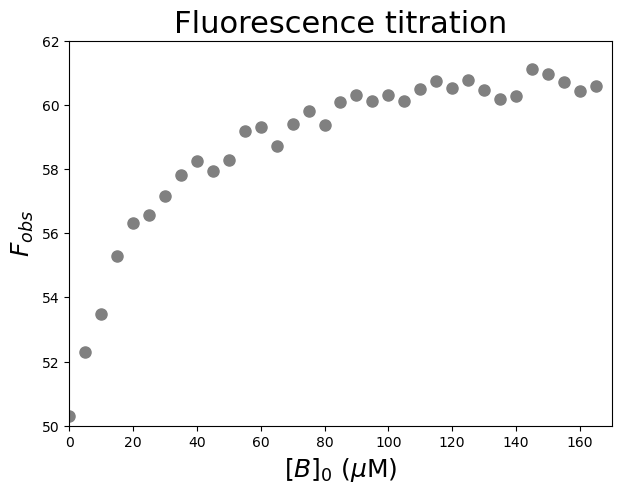

In [3]:
#Plot the data
plt.figure(figsize=(7,5))    #start a figure object

plt.plot(dfWB['[B]0 (µM)'], dfWB['Fobs'],   #plot a set of x (= [B]0), y (= Fobs) data points
         'o', color='gray', markersize=8, linestyle='None')   #use a round, gray marker with size 8; use no line

plt.title('Fluorescence titration', fontsize=22)   #title of graph
plt.xlabel('$[B]_0$ ($\\mu$M)', fontsize=18)   #X-axis label
plt.ylabel('$F_{obs}$', fontsize=18)   #Y-axis label
plt.axis([0, 170, 50, 62])   #axis boundaries, in this case from 0 to 170 for the X-axis and 50 to 62 for the Y-axis

plt.show()   #show the figure object

### _Fitting and reporting the data: $K_d$ and the signal change_

We first specify a parametrized model function (using `def`) to explain our data. The function takes as input 1 independent variable ($x = [B]_0$) and 3 parameters ($F_{min}$, $F_{max}$, and $K_d$):

$$
F_{obs} = F_{min} + (F_{max} - F_{min})\frac{[B]_0}{K_d + [B]_0} .
$$

We then use the `curve_fit` command from SciPy to use non-linear least squares to fit our function to our data. The target function is the first argument, the independent variable the second argument, the dependent variable the third argument and the start values for the parameters the fourth argument. To find an initial guess for the parameters:
- Look at the plotted fluorescence data and estimate the values of $F_{min}$ (_i.e._ start fluorescence) and $F_{max}$ (_i.e._ the end fluorescence).
- Estimate the equilibrium dissociation constant $K_d$ from the concentration of $[B]_0$ which gives about 50% of the change in fluorescence.

```{image} ./Images/ProteinLigandBindingInitialGuesses.png
:alt: Protein-ligand binding assay - initial guesses for parameters
:width: 600px
:align: center
```

The function returns the optimal values for the parameters and the covariance matrix. This covariance matrix can be used to calculate standard errors for the fit parameters.

In [4]:
#Define the protein-ligand binding function (weak binding)
def funcWeakBinding(x, Fmin, Fmax, Kd):
    return Fmin + (Fmax - Fmin) * ((x) / (Kd + x))

In [5]:
#Create a list of substrate concentrations as input for the function
Bin=np.linspace(0, 200, 100)

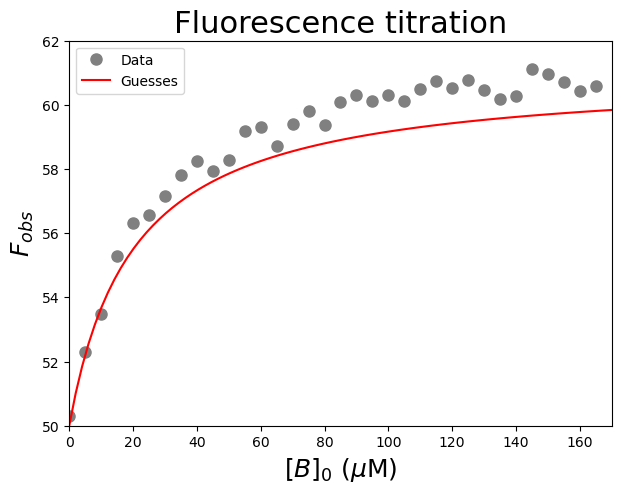

In [6]:
#Test the initial guesses for the fitting parameters
plt.figure(figsize=(7,5))   #start a figure object

plt.plot(dfWB['[B]0 (µM)'], dfWB['Fobs'],   #plot a set of x (= [B]0), y (= Fobs) data points
         'o', color='gray', markersize=8, linestyle='None',   #use a round, gray marker with size 8; use no line
         label='Data')   #add a legend label

plt.plot(Bin, funcWeakBinding(Bin, 50, 61, 20), #Test my guesses for the initial parameters. Use the generated [B]0 array between 0 and 200 as x-values.
         color="red", linestyle='solid',   #use red, solid line
         label='Guesses')   #add a legend label

plt.title('Fluorescence titration', fontsize=22)   #title of graph
plt.xlabel('$[B]_0$ ($\\mu$M)', fontsize=18)   #X-axis label
plt.ylabel('$F_{obs}$', fontsize=18)   #Y-axis label
plt.axis([0, 170, 50, 62])   #axis boundaries, in this case from 0 to 170 for the X-axis and 50 to 62 for the Y-axis
plt.legend()   #add a legend

plt.show()   #show the figure object

In [7]:
#Fit the data with the weak binding curve
paramsWB, params_covarianceWB = curve_fit(funcWeakBinding,   #the function we try to fit to the data
                                          dfWB['[B]0 (µM)'],   #the x values
                                          dfWB['Fobs'],   #the y values
                                          [50, 61, 20])   #my guesses for the initial parameters

#Report the fitted Kd parameter with standard error
print("Kd = ", paramsWB[2], "±", np.sqrt(np.diag(params_covarianceWB))[2])

Kd =  21.700795101327582 ± 1.6910805977378534


The fitted $K_d$ is 22 $\pm$ 2 $\mu$$M$. Now plot the resulting curve on the data and check the residuals to see if the fitting procedure worked well.

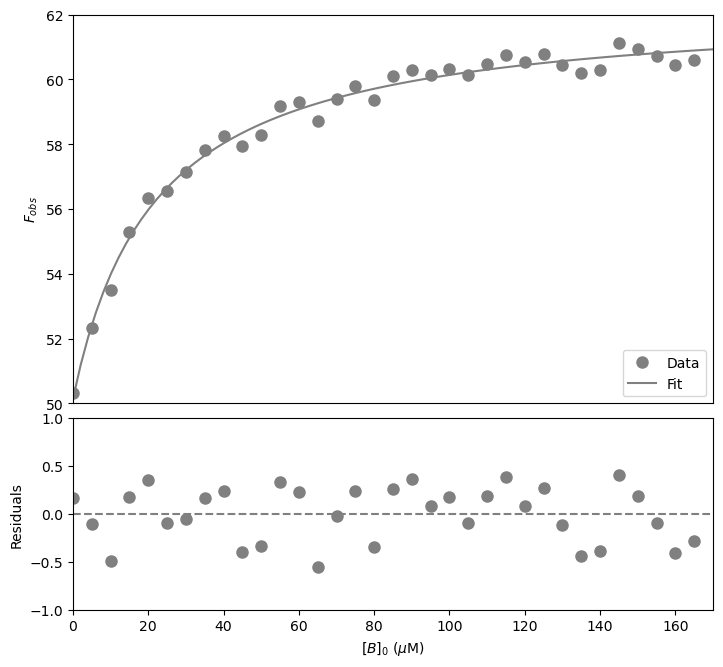

In [8]:
#Calculate the residuals
resid = dfWB['Fobs'] - funcWeakBinding(dfWB['[B]0 (µM)'], *paramsWB)   #calculate the residuals, the star in *paramsWB unpacks the array so the optimized parameter values become the arguments (after the x-values) to the function

#Produce a combined graph
fig = plt.figure()   #to create a figure object

xlimits = [0, 170]   #to make sure we use the same of the X-axis boundaries for both plots

ax1 = fig.add_axes([0.1, 0.53, 1, 0.81])   #to specify the coordinates, width and height of the top plot

ax2 = fig.add_axes([0.1, 0.1, 1, 0.4])   #to specify the coordinates, width and height of the bottom plot

ax1.plot(dfWB['[B]0 (µM)'], dfWB['Fobs'],   #plot a set of x (= [B]0), y (= Fobs) data points
         marker='o', color='gray', markersize=8, linestyle='None',   #use a round, gray marker with size 8; use no line
         label='Data')   #add a legend label

ax1.plot(Bin, funcWeakBinding(Bin, *paramsWB),   #Add the fitted line to plot. Use the generated [B]0 array between 0 and 200 as x-values. Use the fitted parameters to calculate the y-values. The star in *paramsWB unpacks the array so the optimized parameter values become the arguments (after the x-values) to the function.
         color="gray", linestyle='-',   #use a gray, solid line
         label='Fit')   #add a legend label

ax1.axis(xlimits + [50, 62])   #sets the X-axis and Y-axis boundaries for the top plot
ax1.tick_params(axis='x', bottom=False, labelbottom=False)   #removes the ticks and tick labels on the X-axis for the top plot
ax1.set_ylabel('$F_{obs}$')   #adds Y-axis title for the top plot
ax1.legend(loc='lower right')   #include legend

ax2.plot(dfWB['[B]0 (µM)'], resid,   #plot a set of x (= [B]0), y (= the residuals) data points
         marker='o', color='gray', linestyle='None', markersize=8)   #use gray datapoints size 8 and no line

ax2.axhline(0, color='gray', linestyle="--")   #adds a horizontal line at y=0
ax2.axis(xlimits + [-1, 1])   #sets the X-axis and Y-axis boundaries (needs some trial and error to find the right ones!) for the bottom plot
ax2.set_xlabel('$[B]_0$ ($\\mu$M)')   #adds X-axis title for the bottom plot, which is the same for the top plot
ax2.set_ylabel('Residuals')   #adds Y-axis title for the bottom plot

plt.show()   #show the figure object

That looks good! Let's now calculate the signal change.

```{exercise}
:label: myexample8-exercise1

Calculate __<font color=red>the % change in fluorescence</font>__ based on the fitted values of $F_{max}$ and $F_{min}$: 

$$
\% change = \frac{F_{max} - F_{min}}{F_{min}} 100 \% .
$$
```

````{solution} myexample8-exercise1
:label: myexample8-solution1
:class: dropdown

```{code-block} python
#Define a function to calculate the change in fluorescence based on the minimum and maximum fluorescence
def fluochange(fmax, fmin):
    return ((fmax - fmin) / fmin) * 100

#Calculate the change in fluorescence using the minimum and maximum fluorescence from the fit
print(fluochange(pWramsTB[1], pWramsTB[0]))
```

The % change in fluorescence is 24% (increase!).

````

## __<font color=blue>Tight binding conditions</font>__
---

### _Background_

We are provided with data which describe the fluorescence from component $A$ (at 50 $\mu$$M$, $[A]_0 > K_d$) on addition of component $B$. Upon complex formation, we see a decrease in flurescence intensity (_i.e._ fluorescence quenching).

Since the starting $[A]_0$ value is high, a significant amount of $B$ is bound to form $AB$ in the early stages of the titration. As a consequence we cannot assume that $[B] \sim [B]_0$. Thus

$$
K_{d} = \frac{[A]_{eq}[B]_{eq}}{[AB]_{eq}} = \frac{([A]_0 - [AB]_{eq})([B]_0 - [AB]_{eq})}{[AB]_{eq}} .
$$

Rearranging this equation gives __a quadratic equation__ of the form $ax^2 + bx + c = 0$:

$$
[AB]_{eq}^2 - (K_d + [A]_0 + [B]_0)[AB]_{eq} + [A]_0[B]_0 = 0 .
$$

Using the quadratic formula $x = \frac{- b ± \sqrt{b^2 - 4ac}}{2a}$, we can solve this equation (_there is only one physically meaningful solution_): 

$$
[AB]_{eq} = \frac{K_d + [A]_0 + [B]_0 - \sqrt{(K_d + [A]_0 + [B]_0)^2 - 4[A]_0[B]_0}}{2} .
$$

### _Importing the libraries_

In [9]:
#Import the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit

### _Reading and plotting the data_

In [10]:
#Read the Excel file
dfTB = pd.read_excel ('../data/ProteinLigandBinding.xlsx',   #create a pandas DataFrame from the filename with file path and extension shown
                     sheet_name=1,   #use the second sheet
                     header=0)   #our data has column names

print(dfTB)   #print the DataFrame created

    [B]0 (µM)        Fobs
0           0  101.281302
1           5   95.546574
2          10   91.905610
3          15   90.282790
4          20   86.508129
5          25   81.503169
6          30   81.923274
7          35   77.492044
8          40   77.296115
9          45   70.331629
10         50   68.978942
11         55   69.103311
12         60   66.267461
13         65   68.373290
14         70   64.928612
15         75   66.796101
16         80   67.250607
17         85   63.991490
18         90   62.293365
19         95   64.068544
20        100   61.697222
21        105   64.684667
22        110   64.637277
23        115   62.298640
24        120   63.763304
25        125   60.691164
26        130   60.303286
27        135   60.034654
28        140   64.196008
29        145   61.231373
30        150   60.467756
31        155   64.271165
32        160   59.671584
33        165   59.371298


Let's have a look at the relationship between $[B]_0$ and $F_{obs}$. We are going to plot $F_{obs}$ against $[B]_0$.

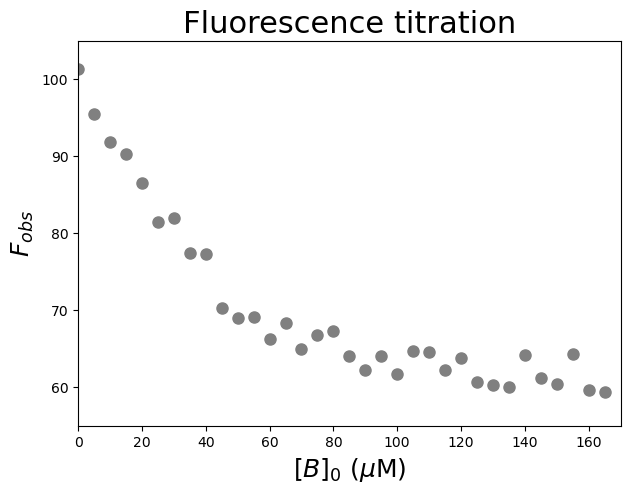

In [11]:
#Plot the data
plt.figure(figsize=(7,5))    #start a figure object

plt.plot(dfTB['[B]0 (µM)'], dfTB['Fobs'],   #plot a set of x (= [B]0), y (= Fobs) data points
         'o', color='gray', markersize=8, linestyle='None')   #use a round, gray marker with size 8; use no line

plt.title('Fluorescence titration', fontsize=22)   #title of graph
plt.xlabel('$[B]_0$ ($\\mu$M)', fontsize=18)   #X-axis label
plt.ylabel('$F_{obs}$', fontsize=18)   #Y-axis label
plt.axis([0, 170, 55, 105])   #axis boundaries, in this case from 0 to 170 for the X-axis and 55 to 105 for the Y-axis

plt.show()   #show the figure object

### _Fitting and reporting the data: $K_d$, signal change and stoichiometry_

We fit the data using the function:

$$
F_{obs} = F_{min} + (F_{max} - F_{min})\frac{K_d + [A]_0 + [B]_0 - \sqrt{(K_d + [A]_0 + [B]_0)^2 - 4[A]_0[B]_0}}{2[A]_0} .
$$

with our independent variable $x = [B]_0$ and 3 parameters $F_{min}$, $F_{max}$, and $K_d$. We need to specify $[A]_0$ outside the function so it can be used within the function.

To find an initial guess for the parameters:
- Look at the plotted fluorescence data and estimate the values of $F_{min}$ (_i.e._ start fluorescence) and $F_{max}$ (_i.e._ the end fluorescence).
- Estimate the equilibrium dissociation constant $K_d$ from the concentration of $[B]_0$ which gives about 50% of the change in fluorescence.

In [12]:
#Set the concentration of [A]0
A0 = 50

#Define the protein-ligand binding function (tight binding)
def funcTightBinding(x, Fmin, Fmax, Kd):
    return Fmin + (Fmax - Fmin) * (((Kd + A0 + x) - ((Kd + A0 + x)**2 - 4 * A0 * x )**(1/2)) / (2 * A0))

In [13]:
#Create a list of substrate concentrations as input for the function
Bin=np.linspace(0, 200, 100)

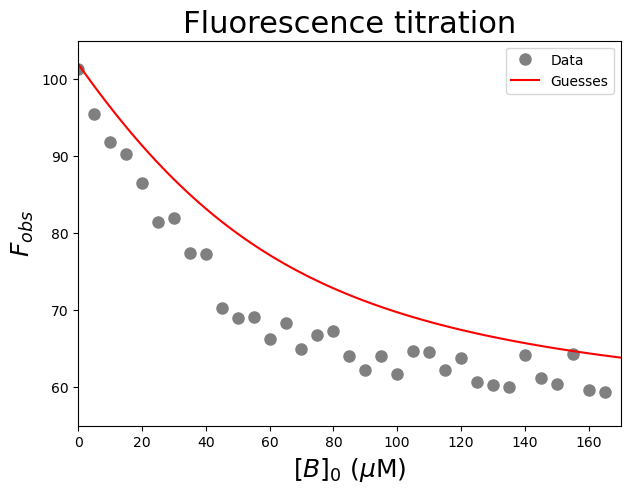

In [14]:
#Test the initial guesses for the fitting parameters
plt.figure(figsize=(7,5))   #start a figure object

plt.plot(dfTB['[B]0 (µM)'], dfTB['Fobs'],   #plot a set of x (= [B]0), y (= Fobs) data points
         'o', color='gray', markersize=8, linestyle='None',   #use a round, gray marker with size 8; use no line
         label='Data')   #add a legend label

plt.plot(Bin, funcTightBinding(Bin, 102, 55, 30), #Test my guesses for the initial parameters. Use the generated [B]0 array between 0 and 200 as x-values.
         color="red", linestyle='solid',   #use red, solid line
         label='Guesses')   #add a legend label

plt.title('Fluorescence titration', fontsize=22)   #title of graph
plt.xlabel('$[B]_0$ ($\\mu$M)', fontsize=18)   #X-axis label
plt.ylabel('$F_{obs}$', fontsize=18)   #Y-axis label
plt.axis([0, 170, 55, 105])   #axis boundaries, in this case from 0 to 170 for the X-axis and 55 to 105 for the Y-axis
plt.legend()   #add a legend

plt.show()   #show the figure object

In [15]:
#Fit the data with the weak binding curve
paramsTB, params_covarianceTB = curve_fit(funcTightBinding,   #the function we try to fit to the data
                                          dfTB['[B]0 (µM)'],   #the x values
                                          dfTB['Fobs'],   #the y values
                                          [102, 55, 30])   #my guesses for the initial parameters

#Report the fitted Kd parameter with standard error
print("Kd = ", paramsTB[2], "±", np.sqrt(np.diag(params_covarianceTB))[2])

Kd =  5.47180159867898 ± 1.3218122693165213


The fitted $K_d$ is 5 $\pm$ 1 $\mu$$M$. There is a large error on the fitted constant!

Note that the $K_d$ is now considerably less than $[A]_0$ confirming this is a tight binding case. A hyperbolic fit would be a poor approximation.

Now plot the resulting curve on the data and check the residuals to see if the fitting procedure worked well.

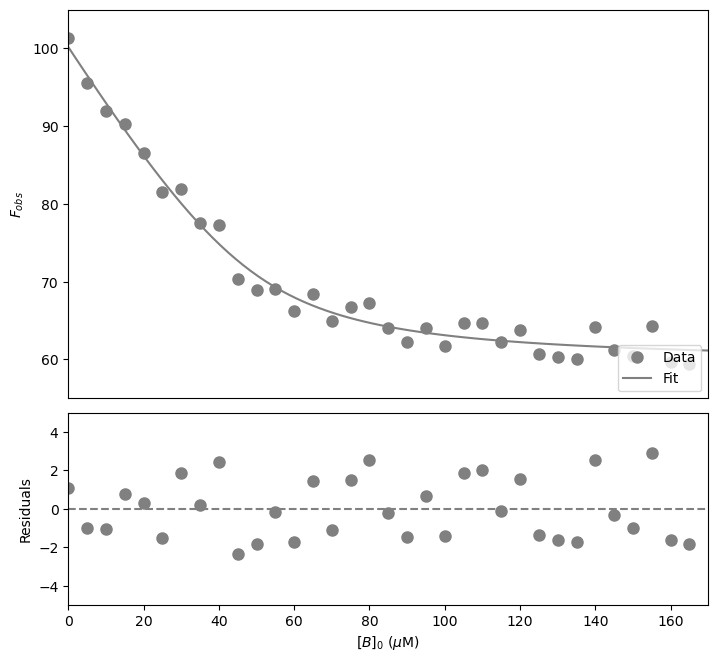

In [16]:
#Calculate the residuals
resid = dfTB['Fobs'] - funcTightBinding(dfTB['[B]0 (µM)'], *paramsTB)   #calculate the residuals, the star in *paramsTB unpacks the array so the optimized parameter values become the arguments (after the x-values) to the function

#Produce a combined graph
fig = plt.figure()   #to create a figure object

xlimits = [0, 170]   #to make sure we use the same of the X-axis boundaries for both plots

ax1 = fig.add_axes([0.1, 0.53, 1, 0.81])   #to specify the coordinates, width and height of the top plot

ax2 = fig.add_axes([0.1, 0.1, 1, 0.4])   #to specify the coordinates, width and height of the bottom plot

ax1.plot(dfTB['[B]0 (µM)'], dfTB['Fobs'],   #plot a set of x (= [B]0), y (= Fobs) data points
         marker='o', color='gray', markersize=8, linestyle='None',   #use a round, gray marker with size 8; use no line
         label='Data')   #add a legend label

ax1.plot(Bin, funcTightBinding(Bin, *paramsTB),   #Add the fitted line to plot. Use the generated [B]0 array between 0 and 200 as x-values. Use the fitted parameters to calculate the y-values. The star in *paramsTB unpacks the array so the optimized parameter values become the arguments (after the x-values) to the function.
         color="gray", linestyle='-',   #use a gray, solid line
         label='Fit')   #add a legend label

ax1.axis(xlimits + [55, 105])   #sets the X-axis and Y-axis boundaries for the top plot
ax1.tick_params(axis='x', bottom=False, labelbottom=False)   #removes the ticks and tick labels on the X-axis for the top plot
ax1.set_ylabel('$F_{obs}$')   #adds Y-axis title for the top plot
ax1.legend(loc='lower right')   #include legend

ax2.plot(dfTB['[B]0 (µM)'], resid,   #plot a set of x (= [B]0), y (= the residuals) data points
         marker='o', color='gray', linestyle='None', markersize=8)   #use gray datapoints size 8 and no line

ax2.axhline(0, color='gray', linestyle="--")   #adds a horizontal line at y=0
ax2.axis(xlimits + [-5, 5])   #sets the X-axis and Y-axis boundaries (needs some trial and error to find the right ones!) for the bottom plot
ax2.set_xlabel('$[B]_0$ ($\\mu$M)')   #adds X-axis title for the bottom plot, which is the same for the top plot
ax2.set_ylabel('Residuals')   #adds Y-axis title for the bottom plot

plt.show()   #show the figure object

That looks good! Let's now calculate the signal change.

```{exercise}
:label: myexample8-exercise2

Calculate the % change in fluorescence based on the fitted values of $F_{max}$ and $F_{min}$.
```

````{solution} myexample8-exercise2
:label: myexample8-solution2
:class: dropdown

```{code-block} python
#Define a function to calculate the change in fluorescence based on the minimum and maximum fluorescence
def fluochange(fmax, fmin):
    return ((fmax - fmin) / fmin) * 100

#Calculate the change in fluorescence using the minimum and maximum fluorescence from the fit
print(fluochange(paramsTB[1], paramsTB[0]))
```

The %change in fluorescence is -41% (decrease!).

````

## __<font color=blue>Let's dive deeper into the topic: experimental design</font>__
---

### _$[A]_0$_

Depending on the value of $K_d$ relative to $[A]_0$, the shape of a binding curve will vary from two straight lines which intersect at __<font color=red>the equivalence point</font>__ in which the amount of $B$ added is just enough to completely neutralize $A$ (for high affinity, small $K_d$ case) to a curve that is practically hyperbolic (for low affinity, large $K_d$ case).

We can use the function we wrote in "Tight binding conditions" to illustrate this:

$$
F_{obs} = F_{min} + (F_{max} - F_{min})\frac{K_d + [A]_0 + [B]_0 - \sqrt{(K_d + [A]_0 + [B]_0)^2 - 4[A]_0[B]_0}}{2[A]_0} .
$$

In [17]:
#Set the concentration of [A]0
A0 = 50

#Define the protein-ligand binding function (tight binding)
def funcTightBinding(x, Fmin, Fmax, Kd):
    return Fmin + (Fmax - Fmin) * (((Kd + A0 + x) - ((Kd + A0 + x)**2 - 4 * A0 * x )**(1/2)) / (2 * A0))

To create a list of $[B]_0$ concentrations, we use the `np.linspace(start, stop, num)` command which returns _num_ evenly spaced samples, calculated over the start-stop interval. 

In [18]:
#Create a list of ligand concentrations as input for the function
xinput = np.linspace(0, 500, 501)

Let’s plot three curves: one with $[A]_0$ (50 $\mu$$M$) $\gg$ $K_d$ (1 $\mu$$M$), one with $[A]_0$ (50 $\mu$$M$) $\ll$ $K_d$ (1 $mM$) $K_d$, and one with $[A]_0$ (50 $\mu$$M$) = $K_d$ (50 $\mu$$M$). The other parameters are $F_{min} = 0$, and $F_{max} = 100$.

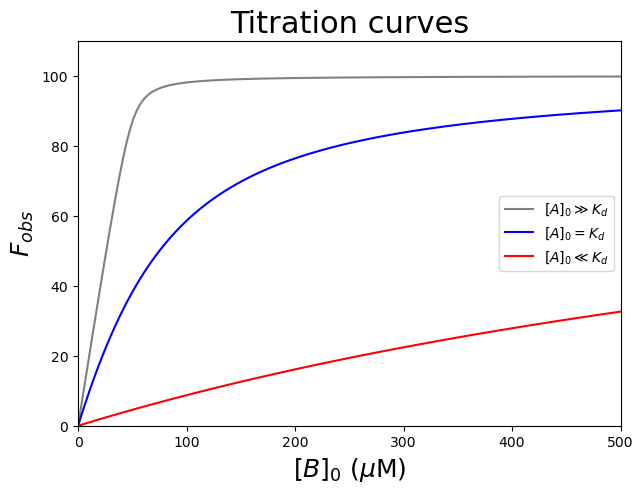

In [19]:
#Plot to compare the conditions
plt.figure(figsize=(7,5))
plt.plot(xinput, funcTightBinding(xinput, 0, 100, 1), color='gray', label='$[A]_0 \\gg K_d$')
plt.plot(xinput, funcTightBinding(xinput, 0, 100, 50), color='blue', label='$[A]_0 = K_d$')
plt.plot(xinput, funcTightBinding(xinput, 0, 100, 1000), color='red', label='$[A]_0 \\ll K_d$')
plt.title('Titration curves', fontsize=22)
plt.legend(loc='center right')
plt.xlabel('$[B]_0$ ($\\mu$M)', fontsize=18)
plt.ylabel('$F_{obs}$', fontsize=18)
plt.axis([0, 500, 0, 110])
plt.show()

The gray curve ($[A]_0 \gg K_d$) clearly shows a sharp bend at the equivalence point and the stoichiometry could be determined accurately for tight binding complexes. The blue and red curves ($[A]_0$ $\leqslant$ $K_d$) look more hyperbolic and the stoichiometry is difficult to determine accurately. Indeed, when $K_d$ > $10[A]_0$, a quadratic equation often fails to converge to a unique fit and it is necessary to use the simpler hyperbolic approximation. The ideal titration is when $K_d = \frac{[A]_0}{10}$ for which $K_d$ and the stoichiometry can be determined with reasonable accuracy. Obviously the $K_d$ is not known initially, but the experiment can be repeated with the appropriate $[A]_0$ concentration once an approximate $K_d$ has been determined.

```{image} ./Images/ProteinLigandBindingEquivalencePoint.png
:alt: Protein-ligand binding assay - equivalence point for various conditions
:width: 600px
:align: center
```

### _$[B]_0$_

The quality of the estimate of $K_d$ depends on covering a ligand concentration range that spans a significant portion of the binding isotherm. As a rule of thumb, we aim for a $[B]_{0}$ range from $0.05 K_d$ to $20 K_d$. We also need to get high data-density in the region of a binding curve that is most important for precise and accurate curve-fitting, _i.e._ around the $K_d$.

Experimentally, a convenient method for choosing ligand concentrations is to first make a stock solution of ligand at the highest concentration that is experimentally reasonable. Then, two-fold serial dilutions can be made from this stock to produce a range of lower ligand concentrations.

For example, let us say that the highest concentration of ligand to be used in the reaction is 200 $\mu$$M$. We could make a 2.0 $mM$ stock solution of the ligand that would be diluted 10-fold into the final assay reaction mixture (_i.e._, to give a final concentration of 200 $\mu$$M$). We could then take a portion of this stock solution and dilute it with an equal volume of buffer to yield a 1.0 $mM$ solution, which upon 10-fold dilution into the assay reaction mixture would give a final ligand concentration of 100 $\mu$$M$. A portion of this solution could also be diluted in half with buffer, and so on, to yield a series of solutions of diminishing ligand concentrations. The final ligand concentrations of such a 2-fold serial dilution scheme are... Let us write a function for that!ng

In [20]:
#Define the dilution function
def FoldDilution(conchigh, conclow, df): #highest concentration and lowest concentration you want
    i = conchigh #start with the highest concentration
    TwoFoldDilution = [] #create an empty list

    while ((i<=conchigh) and (i>=conclow)): #when i (which is either the highest concentration you provided or the newly calculated value) is below the highest concentration and above the lowest concentration you provided
        TwoFoldDilution.append(i) #i will be added to the list
        i = i/df #and a "new" i will be calculated, which will be evaluated 
    return TwoFoldDilution #return the list with calculated concentrations

Let's see which values it returns for 200.0 $\mu$$M$ as highest concentration and around 0.1 $\mu$$M$ as lowest concentration in the assay reaction mixture.

In [21]:
Ligand1 = FoldDilution(200.0, 0.1, 2) #we get a list of concentrations that follow a two-fold dilution starting from 200 𝜇M and ending around 0.1 𝜇M
print(Ligand1)

[200.0, 100.0, 50.0, 25.0, 12.5, 6.25, 3.125, 1.5625, 0.78125, 0.390625, 0.1953125]


That looks good!

Let us now calculate and plot $[AB]_{eq}$ (in $\mu$$M$) against these ligand concentrations $[B]_0$ (in $\mu$$M$). We can use the function we wrote in "Tight binding conditions" to illustrate this:

$$
F_{obs} = F_{min} + (F_{max} - F_{min})\frac{K_d + [A]_0 + [B]_0 - \sqrt{(K_d + [A]_0 + [B]_0)^2 - 4[A]_0[B]_0}}{2[A]_0} .
$$

Let’s use $[A]_0$ (0.2 $\mu$$M$) $\ll$ $K_d$ (10 $\mu$$M$). The other parameters are $F_{min} = 0$, and $F_{max} = 100$. Let us add uniform noise to the simulated data using the `random.uniform` command from NumPy.

In [22]:
#Set the concentration of [A]0
A0 = 0.2

#Define the protein-ligand binding function (tight binding)
def funcTightBinding(x, Fmin, Fmax, Kd):
    return Fmin + (Fmax - Fmin) * (((Kd + A0 + x) - ((Kd + A0 + x)**2 - 4 * A0 * x )**(1/2)) / (2 * A0))

#Create data with random noise
Exp1 = funcTightBinding(np.array(Ligand1), 0, 100, 10)   #we need to convert the list of numbers to a numpy array to use as an input for the mathematical function
Exp1Noise = Exp1 + np.random.uniform(size=Exp1.shape)   #with added random noise

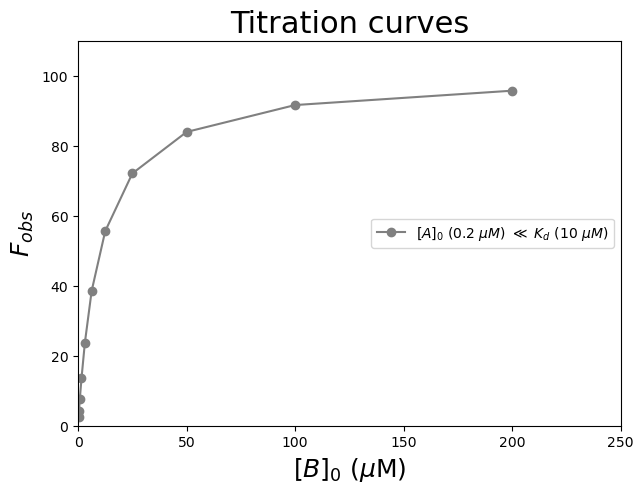

In [23]:
#Plot to check
plt.figure(figsize=(7,5))
plt.plot(Ligand1, Exp1Noise, 'o-', color='gray', label='$[A]_0$ (0.2 $\\mu$$M$) $\\ll$ $K_d$ (10 $\\mu$$M$)')
plt.title('Titration curves', fontsize=22)
plt.legend(loc='center right')
plt.xlabel('$[B]_0$ ($\\mu$M)', fontsize=18)
plt.ylabel('$F_{obs}$', fontsize=18)
plt.axis([0, 250, 0, 110])
plt.show()

```{exercise}
:label: myexample8-exercise3

To demonstrate the importance of a good range of ligand concentrations to determine $K_d$, try to fit the data generated above using non-linear least-squares fitting for
- $[B]_{0}$ ranging from 200.0 $\mu$$M$ to 0.2 $\mu$$M$ (all 11 data points)
- $[B]_{0}$ ranging from 1.6 $\mu$$M$ to 0.2 $\mu$$M$ (the last 4 data point)
- $[B]_{0}$ ranging from 200.0 $\mu$$M$ to 25.0 $\mu$$M$ (the first 4 data points)
```

````{solution} myexample8-exercise3
:label: myexample8-solution3
:class: dropdown

```{code-block} python
#Calculate fitted parameters using a range of data points
paramsALL, params_covarianceALL = curve_fit(funcTightBinding, Ligand1, Exp1Noise, [0,100,10])
print("Kd using all data points = ", paramsALL[2], "±", np.sqrt(np.diag(params_covarianceALL))[2])

paramsLAST4, params_covarianceLAST4 = curve_fit(funcTightBinding, Ligand1[-4:], Exp1Noise[-4:], [0,100,10], maxfev = 1000)
print("Kd using 1.6 to 0.2 microM = ", paramsLAST4[2], "±", np.sqrt(np.diag(params_covarianceLAST4))[2])

paramsFIRST4, params_covarianceFIRST4 = curve_fit(funcTightBinding, Ligand1[:4], Exp1Noise[:4], [0,100,10], maxfev = 1000)
print("Kd using 200.0 to 25.0 microM = ", paramsFIRST4[2], "±", np.sqrt(np.diag(params_covarianceFIRST4))[2Using all data points, we get a $K_d$ = 10.0 ± 0.1 $\mu$$M$, in excellent agreement with the true value of this constant.
```

If measurements are made only at low substrate concentrations, we get a $K_d$ = 277 ± 21870 $\mu$$M$. In this concentration range, we never reach saturation, and graphically, $F_{max}$ appears to be infinite. 

If measurements are made only at high substrate concentrations, we get a $K_d$ = 8 ± 2 $\mu$$M$. We do not have enough data points in the region of a binding curve that is most important for precise and accurate curve-fitting, _i.e._ around the $K_d$.rease!).
````

## __<font color=blue>Binding affinities using the Thermal Shift Assay</font>__
---

When one performs the Thermal Shift Assay (TSA) in the presence of increasing concentrations of ligand, one will (usually) see a shift in the midpoint of the unfolding transition (_i.e._ the melting temperature, $T_m$) as the ligand interacts with and (typically) stabilizes the protein. Remember from the "Thermal shift assay" example, that the $T_m$ can be determined using curve-fitting via:

$$
Y = \frac{(Y_{n'} + m_n T) + (Y_{u'} + m_u T)  \exp (\frac{\Delta H_m (\frac{T}{T_m} - 1) + \Delta C_p (T_m - T + T ln (\frac{T}{T_m}))}{RT})}
{1 + \exp (\frac{\Delta H_m (\frac{T}{T_m} - 1) + \Delta C_p (T_m - T + T ln (\frac{T}{T_m}))}{RT})}
$$

where $m_n$ and $m_u$ account for changes in the signals of the pre- and post-transition regions with changes in temperature and $Y_{n'}$ and $Y_{u'}$ are the signal of the native and unfolded states. $T$ is the temperature, $T_m$ is the midpoint of the thermal unfolding curve, $\Delta H_m$ is the enthalpy change for protein unfolding at $T_m$ and $\Delta C_p$ is the change in heat capacity.

Titration curves for TSA experiments are sometimes presented by showing the $T_m$ as a function of ligand concentration. __However, we cannot simply fit these curves using the weak- or tight-binding equations we have seen earlier.__ These equations are only applicable when the observable is linearly proportional to the fraction of one of the species. $T_m$ is not such a variable as it also represents protein unfolding! In addition, the binding affinity, $K_d$ cannot be assumed constant at different temperatures.

So, we need to take into account the folding - unfolding reaction and the protein - ligand binding reaction: $U$ (unfolded protein) $+ L$ (ligand) $\rightleftharpoons F$ (folded protein) $+ L \rightleftharpoons FL$ (folded portein - ligand complex). $K_U$ is the equilibrium constant for the protein unfolding reaction, and $K_d$ is the equilibrium constant for the dissociation reaction. Both $K_U$ and $K_d$ depend on temperature, but both are constant at fixed temperature (and buffer conditions).

The 2019 paper from Bai and co-workers, available [here](https://www.nature.com/articles/s41598-018-37072-x), describes an isothermal strategy to analyse TSA data. Rather than analysing $T_m$ as a function of ligand concentration, they select a single temperature of interest, and at this temperature evaluate the fraction of protein that is folded / unfolded at each ligand concentration. Because all of the data used correspond to the same temperature, no thermodynamic parameters are required.

Their deviation leads to the following equation:

$$
f_u = \frac{1}{1 + (\frac{1}{K_u} (1 + \frac{[L]}{K_d}))}
$$

with

$$
[L] = \frac{([L]_0 - [P]_0 - K_d (1 + K_u)) + \sqrt{([P]_0 - [L]_0 + K_d (1 + K_u))^2 + 4 [L]_0 K_d (1 + K_u)}}{2}
$$

$[L]_0$ and $[P]_0$ are known experimental parameters; $K_U$ and $K_d$ can be fit at the same time, or alternatively, $K_U$ can first be determined at the temperature of interest from the thermal unfolding curve in the absence of ligand (see the Tutorial _"Determining the free energy of unfolding of proteins in Python"_).

Below, I included the equation and applied it to some experimental data. _If you are interested, Bai and co-workers wrote a free and easy-to-use Python program implementing their isothermal approach for fitting an simulating data (including simulated thermal unfolding curves!). The code is available [here](https://sourceforge.net/projects/dsf-fitting)._

Let us first import the data. Of note, $[P]_0$ is 1 $\mu$M.

In [24]:
#Read the Excel file
dfTSA = pd.read_excel ('../data/ProteinLigandBinding.xlsx',   #create a pandas DataFrame from the filename with file path and extension shown
                     sheet_name=2,   #use the second sheet
                     header=0)   #our data has column names

print(dfTSA)   #print the DataFrame created

    [L]0 (µM)    fu  Unnamed: 2  [P]0 = 1 µM
0        0.15  0.49         NaN          NaN
1        0.30  0.46         NaN          NaN
2        0.60  0.43         NaN          NaN
3        0.90  0.39         NaN          NaN
4        1.20  0.36         NaN          NaN
5        1.50  0.32         NaN          NaN
6        2.00  0.30         NaN          NaN
7        2.50  0.27         NaN          NaN
8        3.00  0.24         NaN          NaN
9        5.00  0.18         NaN          NaN
10       7.00  0.13         NaN          NaN
11      13.00  0.08         NaN          NaN
12      30.00  0.04         NaN          NaN
13     150.00  0.01         NaN          NaN


We can now plot the data. Let's plot $f_u$ versus versus the logarithm of the free ligand concentration, $[L]_0$.

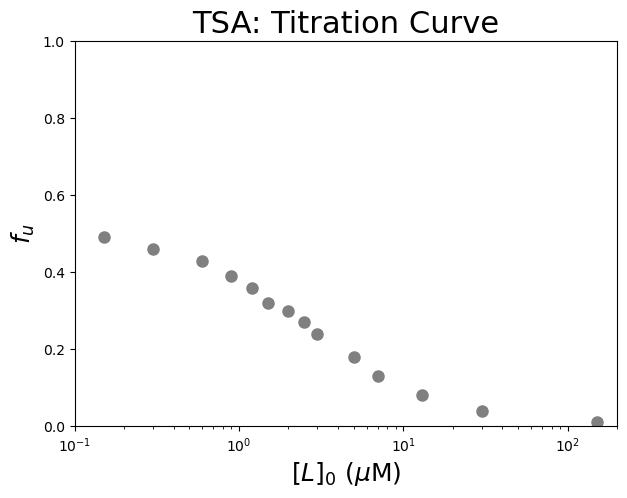

In [25]:
#Plot the data
plt.figure(figsize=(7,5))    #start a figure object

plt.plot(dfTSA['[L]0 (µM)'], dfTSA['fu'],   #plot a set of x (= [L]0), y (= fu) data points
         'o', color='gray', markersize=8, linestyle='None')   #use a round, gray marker with size 8; use no line

plt.xscale("log")   #use a logarithmic scale for the X-axis

plt.title('TSA: Titration Curve', fontsize=22)   #title of graph
plt.xlabel('$[L]_0$ ($\\mu$M)', fontsize=18)   #X-axis label
plt.ylabel('$f_{u}$', fontsize=18)   #Y-axis label
plt.axis([0.1, 200, 0, 1])   #axis boundaries, in this case from 0.1 to 200 for the X-axis and 0 to 1 for the Y-axis

plt.show()   #show the figure object

We now define the function and try out some initial guesses for $K_u$, and $K_d$.

Look at the plotted data to find an initial guess for the parameters:
- Use the $f_u$ value at zero ligand concentration to estimate $K_u$ using $K_u = \frac{[U]_{eq}}{[N]_{eq}} = \frac{f_u}{f_n} = \frac{f_u}{1 - f_u}$.
- Estimate the equilibrium dissociation constant $K_d$ from the concentration of $[L]_0$ which gives about 50% of the change in $f_u$.

See how the protein concentration $[P]_0$ is one of the parameters for the function. This is to include uncertainties for the protein concentration during the fit. Yet, we will use `bounds` during fitting that will force this parameter to be searched within custom boundaries. We remove bounds for the other parameters with `(-)np.inf`.

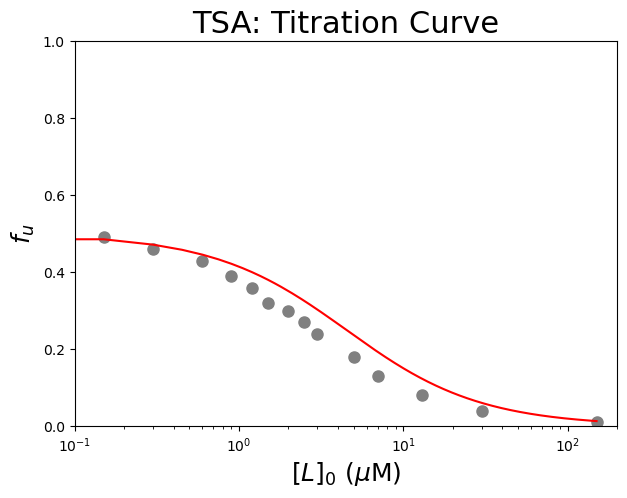

In [26]:
#Define the function
def calculate_fitted_isothermal_point(ligand_conc, Ku, Kd, protein_conc):
    Kd = abs(Kd)
    Ku = abs(Ku)
    b = protein_conc + Kd*(1+Ku) - ligand_conc
    c = -1.0 * ligand_conc * Kd * (1+Ku)
    L_free = (-b+np.sqrt(b*b-4*c))/2
    fit_fraction_unfolded = 1 / (1 + (1/Ku)*(1+L_free/Kd))
    return fit_fraction_unfolded

#Create a list of substrate concentrations as input for the function
Bin=np.linspace(0, 150, 1000)

#Test the initial guesses for the fitting parameters
plt.figure(figsize=(7,5))   #start a figure object
plt.plot(dfTSA['[L]0 (µM)'], dfTSA['fu'], 'o', color='gray', markersize=8)   #plot a set of x (= [L]0), y (= fu) data points
plt.plot(Bin, calculate_fitted_isothermal_point(Bin, 1, 2, 1), color="red",label='Guess')   #Test my guesses for the initial parameters. Use the generated [B]0 array between 0 and 150 as x-values.
plt.xscale("log")   #use a logarithmic scale for the X-axis
plt.title('TSA: Titration Curve', fontsize=22)   #title of graph
plt.xlabel('$[L]_0$ ($\\mu$M)', fontsize=18)   #X-axis label
plt.ylabel('$f_{u}$', fontsize=18)   #Y-axis label
plt.axis([0.1, 200, 0, 1])   #axis boundaries, in this case from 0.1 to 200 for the X-axis and 0 to 1 for the Y-axis
plt.show()   #show the figure object

In [27]:
#Fit the data with the curve
paramsTSA, params_covarianceTSA = curve_fit(calculate_fitted_isothermal_point, dfTSA['[L]0 (µM)'],dfTSA['fu'],
                                               [2, 2, 1], bounds=((-np.inf,-np.inf,0.95), (np.inf,np.inf,1.05)))

#Report the fitted parameters with standard error
print("Ku = ", paramsTSA[0], "±", np.sqrt(np.diag(params_covarianceTSA))[0])
print("Kd = ", paramsTSA[1], "±", np.sqrt(np.diag(params_covarianceTSA))[1])

Ku =  1.0346673472477854 ± 0.023627867848768445
Kd =  1.1065639771448268 ± 0.06298727759934804


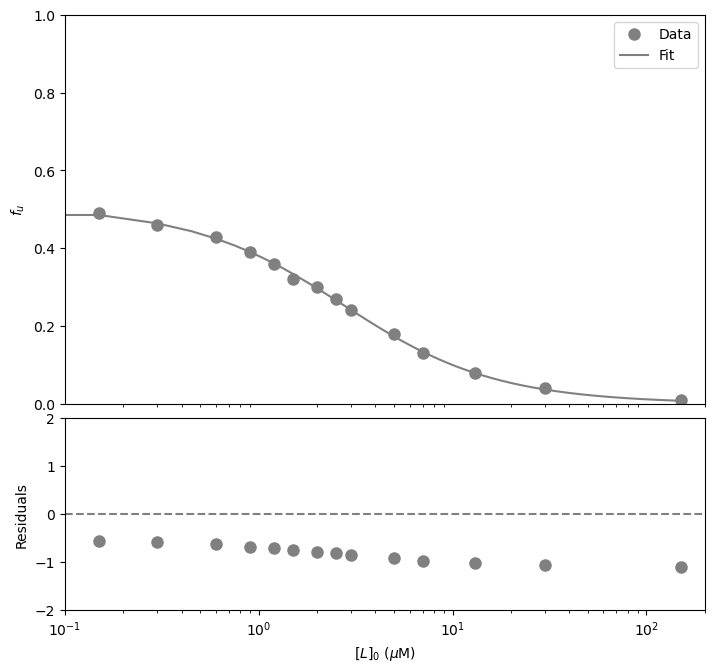

In [28]:
#Calculate the residuals
resid = dfTSA['fu'] - funcTightBinding(dfTSA['[L]0 (µM)'], *paramsTSA)   #calculate the residuals, the star in *paramsTB unpacks the array so the optimized parameter values become the arguments (after the x-values) to the function

#Produce a combined graph
fig = plt.figure()   #to create a figure object

xlimits = [0.1, 200]   #to make sure we use the same of the X-axis boundaries for both plots

ax1 = fig.add_axes([0.1, 0.53, 1, 0.81])   #to specify the coordinates, width and height of the top plot

ax2 = fig.add_axes([0.1, 0.1, 1, 0.4])   #to specify the coordinates, width and height of the bottom plot

ax1.plot(dfTSA['[L]0 (µM)'], dfTSA['fu'],   #plot a set of x (= [L]0), y (= fu) data points
         marker='o', color='gray', markersize=8, linestyle='None',   #use a round, gray marker with size 8; use no line
         label='Data')   #add a legend label

ax1.plot(Bin, calculate_fitted_isothermal_point(Bin, *paramsTSA),   #Add the fitted line to plot. Use the generated [L]0 array between 0 and 150 as x-values. Use the fitted parameters to calculate the y-values. The star in *paramsTSA unpacks the array so the optimized parameter values become the arguments (after the x-values) to the function.
         color="gray", linestyle='-',   #use a gray, solid line
         label='Fit')   #add a legend label

ax1.axis(xlimits + [0, 1])   #sets the X-axis and Y-axis boundaries for the top plot
ax1.set_xscale("log")   #use a logarithmic scale for the X-axis
ax1.tick_params(axis='x', bottom=False, labelbottom=False)   #removes the ticks and tick labels on the X-axis for the top plot
ax1.set_ylabel('$f_u$')   #adds Y-axis title for the top plot
ax1.legend(loc='best')   #include legend

ax2.plot(dfTSA['[L]0 (µM)'], resid,   #plot a set of x (= [B]0), y (= the residuals) data points
         marker='o', color='gray', linestyle='None', markersize=8)   #use gray datapoints size 8 and no line

ax2.axhline(0, color='gray', linestyle="--")   #adds a horizontal line at y=0
ax2.axis(xlimits + [-2, 2])   #sets the X-axis and Y-axis boundaries (needs some trial and error to find the right ones!) for the bottom plot
ax2.set_xscale("log")   #use a logarithmic scale for the X-axis
ax2.set_xlabel('$[L]_0$ ($\\mu$M)')   #adds X-axis title for the bottom plot, which is the same for the top plot
ax2.set_ylabel('Residuals')   #adds Y-axis title for the bottom plot

plt.show()   #show the figure object

## __<font color=blue>References</font>__
---

Bai, N., Roder, H., Dickson, A. and Karanicolas, J. Isothermal Analysis of ThermoFluor Data can readily provide Quantitative Binding Affinities. Sci Rep 9, 2650 (2019).

Brune, M., Hunter, J.L., Corrie, J.E.T., and Webb, M.R. Direct, real-time measurement of rapid inorganic phosphate release using a novel fluorescent probe and its application to actomyosin subfragment 1 ATPase. Biochemistry 33, 8262-8271 (1994).